# 2.6 Geometric View:  Points in Space

In [2]:
from mlwpy import * 

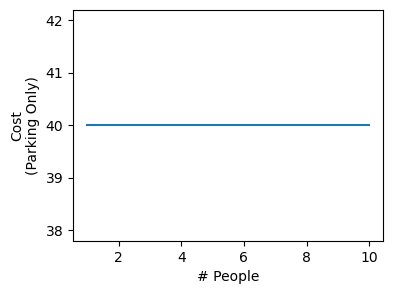

In [3]:
people = np.arange(1,11)
total_cost = np.ones_like(people) * 40.0

ax = plt.gca()

ax.plot(people, total_cost)
ax.set_xlabel("# People")
ax.set_ylabel("Cost\n(Parking Only)");

In [4]:
people = np.arange(1,11)
total_cost = 80.0 * people + 40.0

In [5]:
# .T (transpose) to save vertical space in print out
display(pd.DataFrame({'total_cost':total_cost.astype(np.int64)}, 
                     index=people).T)

/Users/markkim/Desktop/CSC412/notebooks/Week2/mlwpy.py:55: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return "{\centering\n%s\n\medskip}" % self.to_latex()


,1,2,3,4,5,6,7,8,9,10
total_cost,120,200,280,360,440,520,600,680,760,840


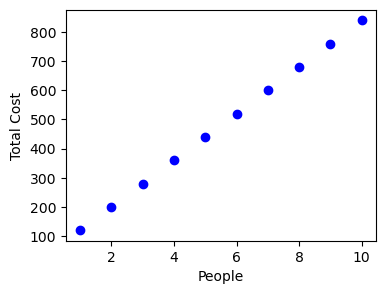

In [6]:
ax = plt.gca()
ax.plot(people, total_cost, 'bo')
ax.set_ylabel("Total Cost")
ax.set_xlabel("People");

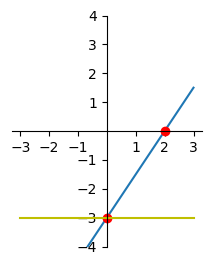

In [7]:
# paint by number
# create 100 x values from -3 to 3
xs = np.linspace(-3, 3, 100)

# slope (m) and intercept (b)
m, b = 1.5, -3

ax = plt.gca()

ys = m*xs + b
ax.plot(xs, ys)

ax.set_ylim(-4,4)
high_school_style(ax) # helper from mlwpy.py

ax.plot(0, -3,'ro') # y-intercept
ax.plot(2,  0,'ro') # two steps right gives three steps up

# y = mx + b with m=0 gives y = b
ys = 0*xs + b
ax.plot(xs, ys, 'y');

In [8]:
# np.c_[] lets us create an array column-by-column
xs    = np.linspace(-3, 3, 100)
xs_p1 = np.c_[xs, np.ones_like(xs)]

# view the first few rows
display(pd.DataFrame(xs_p1).head())

/Users/markkim/Desktop/CSC412/notebooks/Week2/mlwpy.py:55: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  return "{\centering\n%s\n\medskip}" % self.to_latex()


,0,1
0,-3.0000,1.0000
1,-2.9394,1.0000
2,-2.8788,1.0000
3,-2.8182,1.0000
4,-2.7576,1.0000


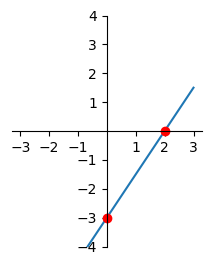

In [9]:
w     = np.array([1.5, -3])
ys    = np.dot(xs_p1, w)


ax = plt.gca()
ax.plot(xs, ys)

# styling
ax.set_ylim(-4,4)
high_school_style(ax)

ax.plot(0, -3,'ro')  # y-intercept
ax.plot(2,  0,'ro'); # two steps to the right should be three whole steps up

In [11]:
number_people = np.arange(1,11) # 1-10 people
number_rbs    = np.arange(0,20) # 0-19 rootbeers

# numpy tool to get cross-product of values (each against each)
# in two paired arrays.  try out: np.meshgrid([0,1], [10,20])
# "perfect" for functions of multiple variables
number_people, number_rbs = np.meshgrid(number_people, number_rbs) 

total_cost = 80 * number_people + 10 * number_rbs + 40

(0.0, 1.0, 0.0, 1.0)

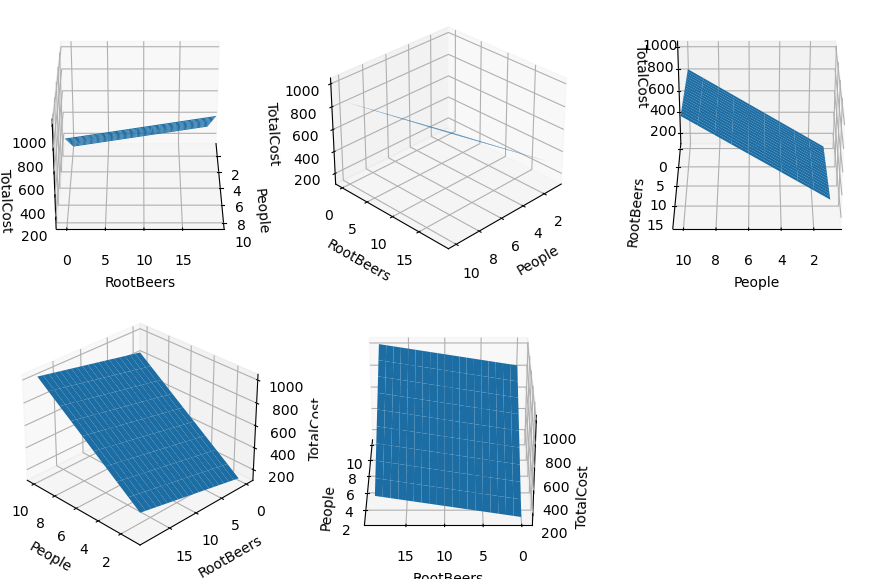

In [12]:
# import needed for 'projection':'3d'
from mpl_toolkits.mplot3d import Axes3D
fig,axes = plt.subplots(2, 3, 
                        subplot_kw={'projection':'3d'}, 
                        figsize=(9,6),
                        tight_layout=True)

angles = [0,45,90,135,180]
for ax,angle in zip(axes.flat, angles):
    ax.plot_surface(number_people, number_rbs, total_cost)
    ax.set_xlabel("People")
    ax.set_ylabel("RootBeers")
    ax.set_zlabel("TotalCost")
    ax.azim = angle

# we don't use the last axis
axes.flat[-1].axis('off')

In [ ]:
number_people  = np.array([2,3])
number_rbs     = np.array([0,1,2])
number_hotdogs = np.array([2,4])

costs = np.array([80, 10, 5])

columns = ["People", "RootBeer", "HotDogs", "TotalCost"]

In [ ]:
costs = np.array([80, 10, 5])
counts = np_cartesian_product(number_people, 
                              number_rbs, 
                              number_hotdogs)

totals = np.dot(counts, costs) + 40
display(pd.DataFrame(np.column_stack([counts, totals]), 
                     columns=columns).head(8))

# 2.7 Notation and Plus-One Trick

In [ ]:
fig, axes = plt.subplots(2,2, tight_layout=True)

titles = ["$y=c_0$", 
          "$y=c_1x+c_0$",
          "$y=c_2x^2+c_1x+c_0$",
          "$y=c_3x^3+c_2x^2+c_1x+c_0$"]

xs = np.linspace(-10, 10, 100)
for power, (ax, title) in enumerate(zip(axes.flat, titles), 1):
    coeffs = np.random.uniform(-5, 5, power)
    poly = np.poly1d(coeffs)
    ax.plot(xs, poly(xs))
    ax.set_title(title)

In [ ]:
plt.Figure((2,1.5))

xs = np.linspace(-10,10,101)
coeffs = np.array([2,3,4])
ys = np.dot(coeffs, [xs**2, xs**1, xs**0])

# nice parabola via a dot-product
plt.plot(xs, ys);

In [ ]:
oned_vec = np.arange(5)
print(oned_vec, "-->", oned_vec * oned_vec)
print("self dot:", np.dot(oned_vec, oned_vec))

In [ ]:
row_vec = np.arange(5).reshape(1,5)
col_vec = np.arange(0, 50, 10).reshape(5,1)

In [ ]:
print("row vec:", row_vec, 
      "col_vec:", col_vec, 
      "dot:", np.dot(row_vec, col_vec), sep='\n')

In [ ]:
out = np.dot(col_vec, row_vec)
print(out)

In [ ]:
out = np.dot(row_vec, col_vec)
out

In [ ]:
col_vec = np.arange(0, 50, 10).reshape(5,1)
row_vec = np.arange(0,5).reshape(1,5)

oned_vec = np.arange(5)

np.dot(oned_vec, col_vec)

In [ ]:
try: 
    np.dot(col_vec, oned_vec) # *boom*
except ValueError as e:  
    print("I went boom:", e)

In [ ]:
print(oned_vec.shape,
      col_vec.shape, sep="\n")

In [ ]:
print(np.dot(row_vec, oned_vec))
try: print(np.dot(oned_vec, row_vec))
except: print("boom")

In [ ]:
print(np.allclose(np.dot(oned_vec.reshape(1,5), col_vec), 
                  np.dot(oned_vec,              col_vec)),
      np.allclose(np.dot(row_vec, oned_vec.reshape(5,1)), 
                  np.dot(row_vec, oned_vec)))

In [ ]:
D = np.array([[1,3],
              [2,5],
              [2,7],
              [3,2]])
w = np.array([1.5, 2.5])

In [ ]:
np.dot(D,w)

In [ ]:
try: 
    np.dot(w,D)
except ValueError:  
    print("BOOM.  :sadface:")

In [ ]:
def rdot(arr,brr):
    ' reversed argument version of np.dot'
    return np.dot(brr,arr)
rdot(w, D)

In [ ]:
1.1 + 2.2 == 3.3

In [ ]:
type(1.1), type(2.1), type(1.1+2.1), type(3.3)

In [ ]:
np.allclose(1.2 + 2.1, 3.3)